# **Downloading Dataset**

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

Mounted at /content/drive


In [ ]:
! kaggle datasets download nikhil7280/weather-type-classification

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other


In [ ]:
! unzip /content/weather-type-classification.zip

Archive:  /content/weather-type-classification.zip
  inflating: weather_classification_data.csv  


# **Data Initialization**

I only use the panadas function for loading and displaying dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In this section, the data is initialized and loaded into a format that allows further preprocessing and analysis. The dataset used for this weather type classification task contains various weather-related features which will serve as input to the model, along with the target variable, "Weather Type," which represents the classification label we aim to predict.

1. Loading the Data:

 - The dataset is loaded from a CSV file into a Pandas DataFrame. A DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure that allows easy manipulation, filtering, and analysis. Using the pandas.read_csv() function, the weather dataset is loaded, which contains columns describing various weather conditions like temperature, humidity, wind speed, and more, along with the target variable "Weather Type."

2. Exploring the Data:

  - After loading the data, it is essential to examine the contents briefly to understand its structure and the types of variables it contains. This is done using the head() function. The head() function is typically used to preview the first few rows of the DataFrame, providing a snapshot of the data. This helps verify that the data has been loaded correctly and that the columns represent the features and target variable as expected.

3. Converting Data to NumPy Array:

  - To facilitate the machine learning model's computation, the DataFrame is converted into a NumPy array. This step is necessary because many machine learning algorithms require data in a numerical array format for efficient processing. The to_numpy() function is used to perform this conversion, producing an array that retains the same data but in a format optimized for numeric operations.

4. Shape of the Data:
  
  - It is important to understand the dimensions of the dataset—how many observations (rows) and features (columns) it contains. The shape attribute of the NumPy array is used here to get the number of rows and columns. This allows for a quick assessment of the size of the dataset and considerations for memory management or computational efficiency.


Summary:

- This section ensures that the dataset is properly loaded, inspected, and formatted for analysis. The transition from a DataFrame to a NumPy array enables efficient numerical computation, while understanding the dataset’s structure (rows and columns) is crucial for the next steps in machine learning. Proper initialization sets the foundation for accurate data preprocessing and modeling.


In [ ]:
data = pd.read_csv("/content/weather_classification_data.csv")
data

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [ ]:
data_numpy = data.to_numpy()

In [ ]:
# Shape of the data
num_rows, num_columns = data_numpy.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 13200
Number of columns: 11


# **Handling Non Numeric Features**

In this section, the focus is on preprocessing and handling non-numeric features in the dataset. Non-numeric features, such as categorical variables, need to be appropriately transformed into numeric values before they can be used in machine learning models. Many algorithms, such as logistic regression, support vector machines, and neural networks, require all input features to be numerical.

1. Identifying Non-Numeric Features:

  - The first step in handling non-numeric data is identifying which columns in the dataset are categorical or non-numeric. These columns usually contain textual data representing categories or classes (e.g., "Season", "Location", "Weather Type"). Identifying them helps to decide the appropriate encoding technique to apply.

2. Encoding Categorical Variables:
  
  - Non-numeric features can be encoded into numerical values using various techniques. One of the most common methods is **Label Encoding**, where each unique category is assigned a unique integer. For instance, the "Season" feature with categories like "Spring", "Summer", "Autumn", and "Winter" could be mapped to integers (0, 1, 2, 3). This method is typically used when the categorical variable has a natural ordering (e.g., "Low", "Medium", "High").

3. Transforming "Season" Feature (Example):

  - If the "Season" feature is categorical with no inherent order, label encoding can be used:
    - Each season (e.g., "Spring", "Summer", "Autumn", "Winter") will be assigned an integer.
    - If an observation is from the "Spring" season, it will be labeled with a specific integer, and the same process applies to other categories.

4. Transforming "Location" Feature (Example):

  - The "Location" feature can also be transformed using label encoding, where each unique location (e.g., "inland", "mountain", "coastal") is mapped to an integer value. The transformed feature will then be numeric, making it suitable for machine learning models.

5. Handling the Target Variable ("Weather Type"):

  - If the target variable, "Weather Type", is categorical, it can be encoded using label encoding. In this case, each weather type (e.g., "Cloudy", "Rainy", "Snowy") will be assigned a corresponding integer.

6. Final Data Transformation:

  - After transforming all non-numeric columns, the dataset will consist entirely of numeric features, which are ready for input into machine learning models. The transformations ensure that the models can properly understand and process the data.

Summary:

  - This section ensures that non-numeric features are correctly transformed into numeric values. The use of encoding techniques such as label encoding ensures that categorical data can be effectively incorporated into machine learning algorithms, which typically require numerical input. Properly handling non-numeric features is an essential step in data preprocessing that enables the model to learn from all available information.


In [ ]:
# Define which columns are categorical
categorical_columns = [4, 7, 9, 10]

In [ ]:
# Function to apply Label Encoding
def label_encode(data_numpy, categorical_columns):
    for col in categorical_columns:
        unique_values = np.unique(data_numpy[:, col])  # Find unique categories in the column
        value_to_int = {value: idx for idx, value in enumerate(unique_values)}  # Create a mapping
        data_numpy[:, col] = np.vectorize(value_to_int.get)(data_numpy[:, col])  # Apply the mapping to the column
    return data_numpy

In [ ]:
# Apply label encoding to categorical columns
data_encoded = label_encode(data_numpy, categorical_columns)
data_encoded

array([[14.0, 73, 9.5, ..., 3.5, 1, 1],
       [39.0, 96, 8.5, ..., 10.0, 1, 0],
       [30.0, 64, 7.0, ..., 5.5, 2, 3],
       ...,
       [30.0, 77, 5.5, ..., 9.0, 0, 0],
       [3.0, 76, 10.0, ..., 2.0, 1, 2],
       [-5.0, 38, 0.0, ..., 10.0, 2, 1]], dtype=object)

# **Visuallization**

In this section, various visualizations are created to explore the dataset and understand the relationships between features. Visualization helps to identify patterns, detect potential issues like outliers, and visualize feature distributions. The following plots are used in this notebook:

1. **Scatter Plot Matrix (Pairplot of Numerical Features)**:
   This plot is used to visualize the relationships between all pairs of numerical features. Scatter plots show how each feature correlates with every other feature. Each scatter plot represents a combination of two numerical features, while the diagonal plots display the distribution of each feature. This matrix helps in identifying:
   - Potential linear or non-linear relationships between features.
   - Any patterns or clusters that may be relevant for model building.
   - Outliers or unusual data points that may need to be addressed.

2. **Histograms**:
   Histograms provide a graphical representation of the distribution of each feature. Each bar in the histogram shows the frequency of data points within a specified range (bin). These plots allow us to:
   - Assess the distribution of features (e.g., whether a feature is normally distributed or skewed).
   - Detect potential outliers by looking for bins with unusual frequencies.
   - Identify if any transformations (e.g., normalization or scaling) are needed for better model performance.

3. **Box Plots**:
   Box plots offer a summary of the distribution of data and are useful for identifying outliers. The box plot displays:
   - The median of the data (central line inside the box).
   - The interquartile range (the box represents the middle 50% of the data).
   - Outliers, which are any points outside the whiskers (typically defined as 1.5 times the interquartile range).
   This plot helps to understand the spread and central tendency of features and to quickly identify if any features contain significant outliers.

Summary:

- These visualizations are essential for understanding the structure and distribution of data. The scatter plot matrix reveals the relationships between features, histograms show how individual features are distributed, and box plots provide a way to identify outliers. Together, these plots provide key insights that inform preprocessing decisions and guide the model selection process.


## Pair Plot

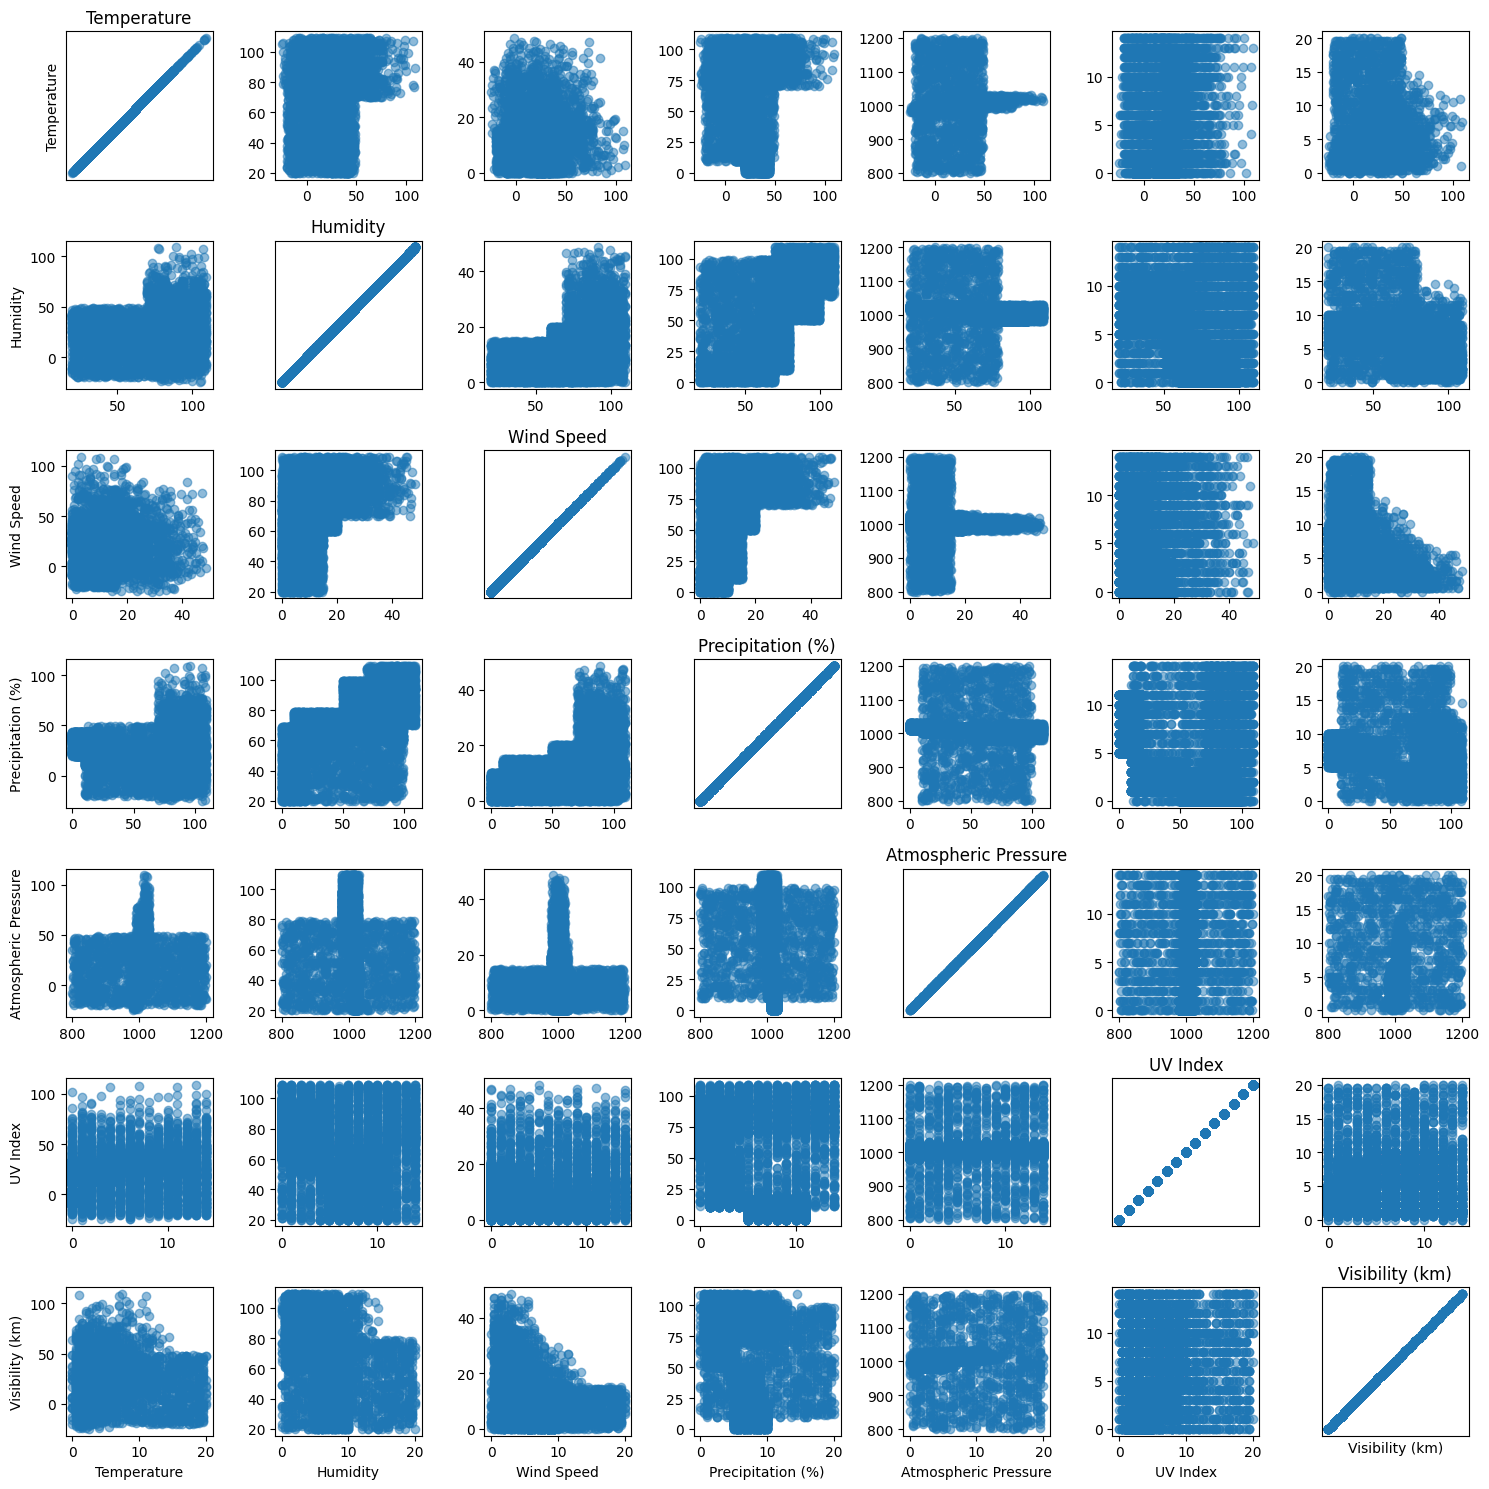

In [ ]:
# Select numerical columns for the pairplot (excluding the target variable 'Weather Type')
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Create a grid of subplots
fig, axes = plt.subplots(len(numerical_columns), len(numerical_columns), figsize=(15, 15))

# Loop over each pair of numerical columns
for i, col1 in enumerate(numerical_columns):
    for j, col2 in enumerate(numerical_columns):
        axes[i, j].scatter(data[col1], data[col2], alpha=0.5)
        if i == len(numerical_columns) - 1:
            axes[i, j].set_xlabel(col2)
        if j == 0:
            axes[i, j].set_ylabel(col1)
        if i == j:
            axes[i, j].set_title(col1)
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Histogram(Bar Plot)

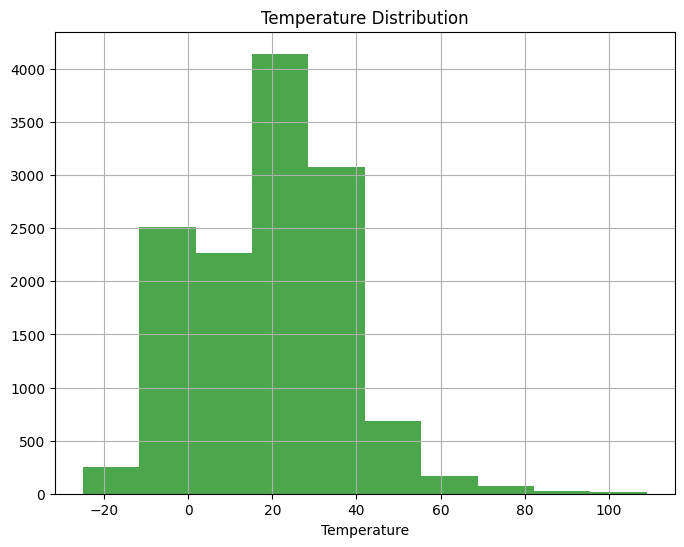

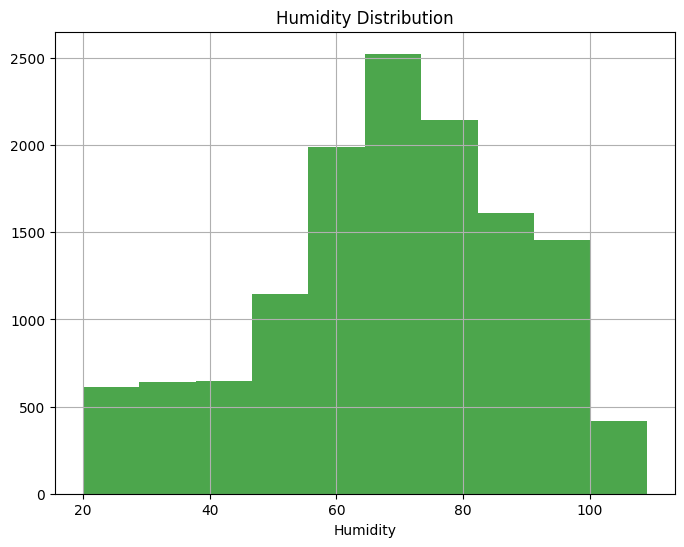

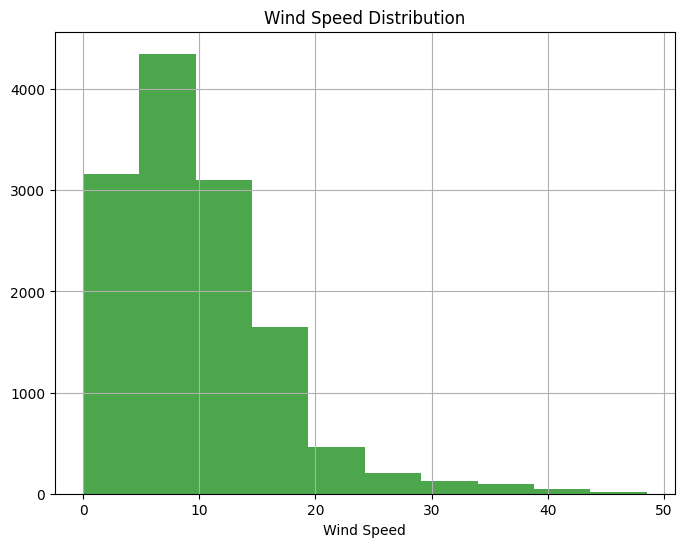

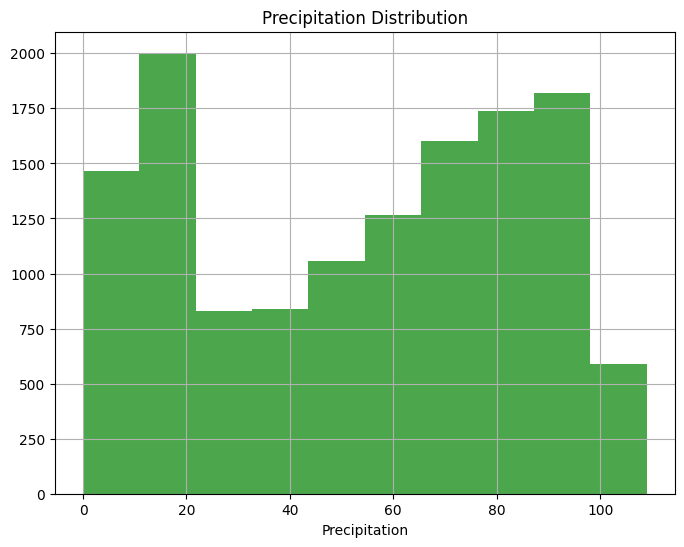

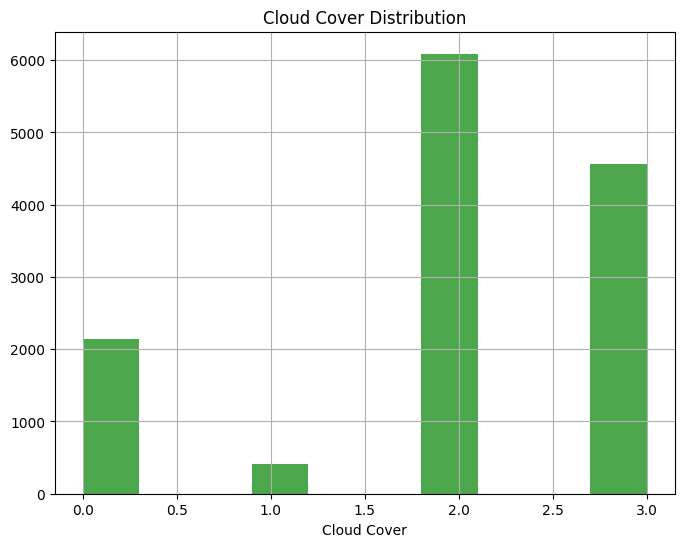

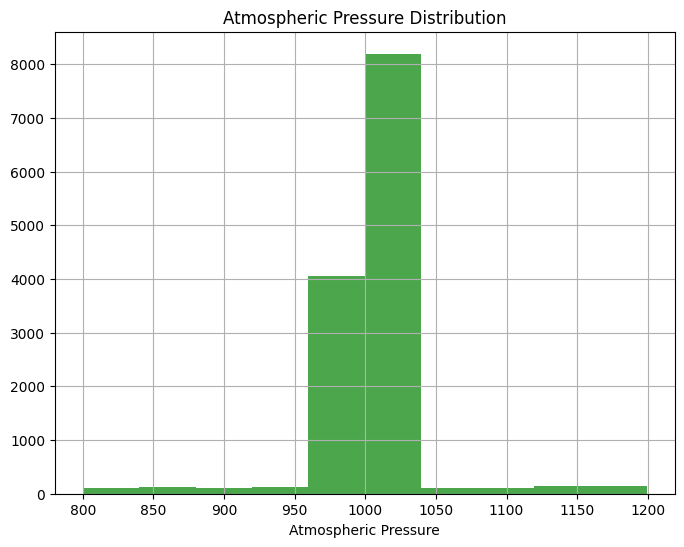

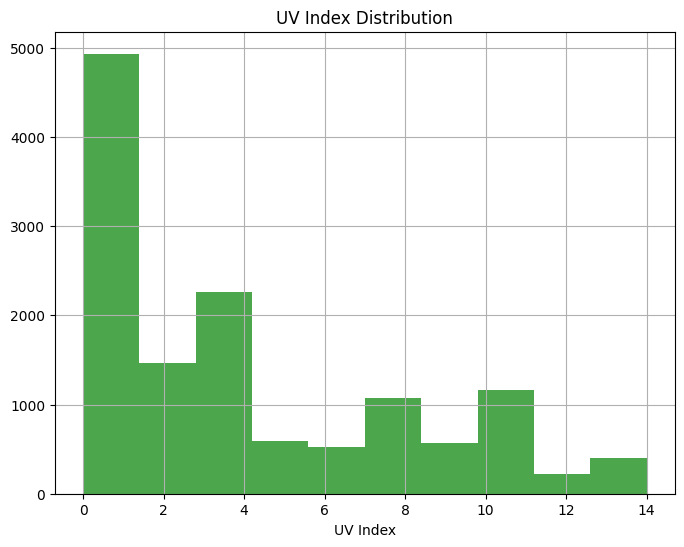

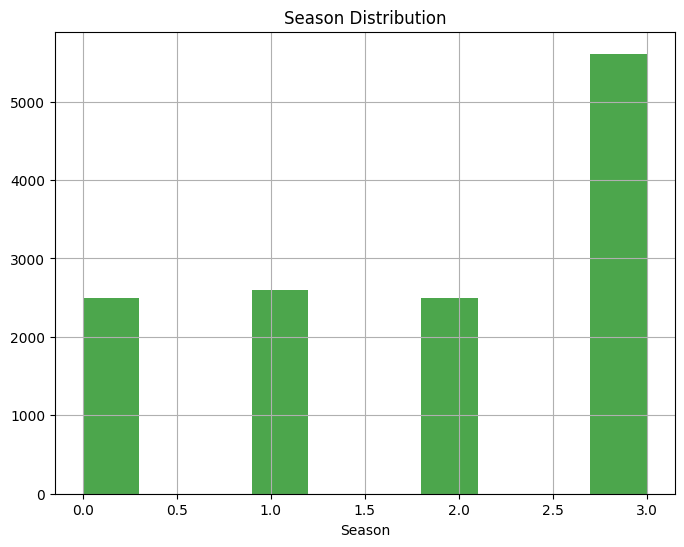

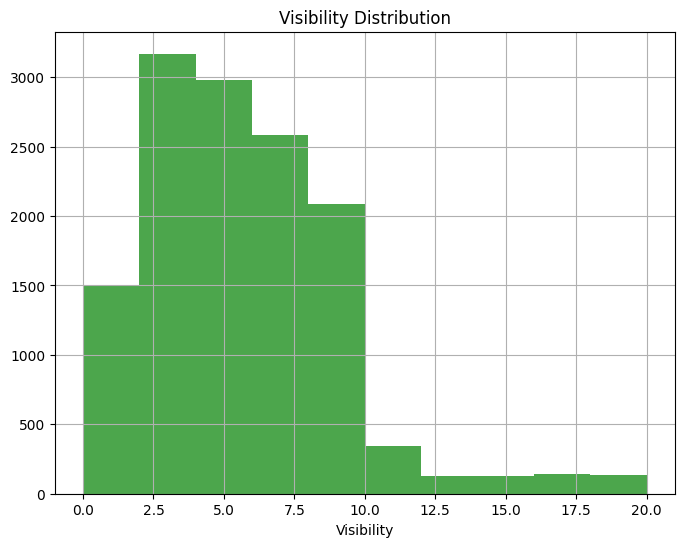

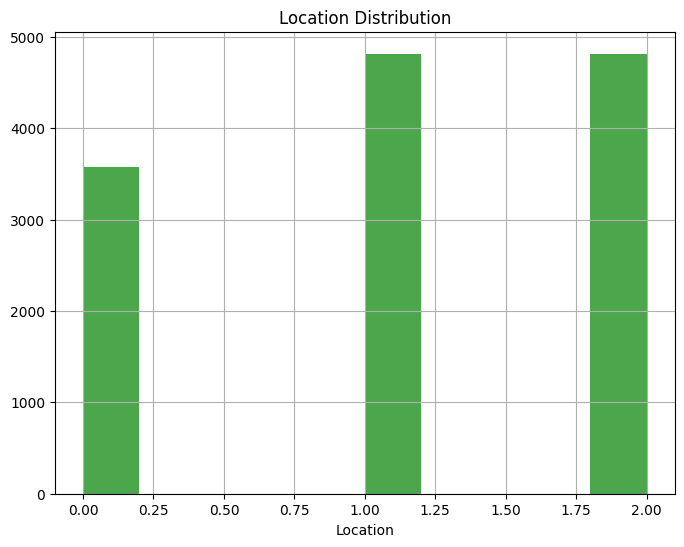

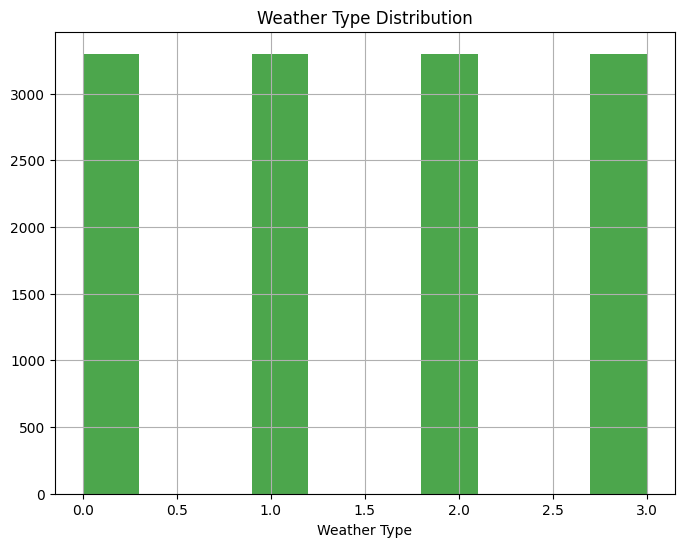

In [ ]:
column_names = [
    'Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover',
    'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility', 'Location', 'Weather Type'
]

# Check if the number of columns in data matches the number of column names
if data_encoded.shape[1] != len(column_names):
    raise ValueError(f"The number of columns in the data ({data_encoded.shape[1]}) does not match the number of column names ({len(column_names)}). Please update the column names list.")


# Histogram: Distribution of fitures
for i in range(data_encoded.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.hist(data_encoded[:, i], bins=10, color='green', alpha=0.7)
    plt.title(f'{column_names[i]} Distribution')
    plt.xlabel(column_names[i])
    plt.grid(True)
    plt.show()

## Box Plot

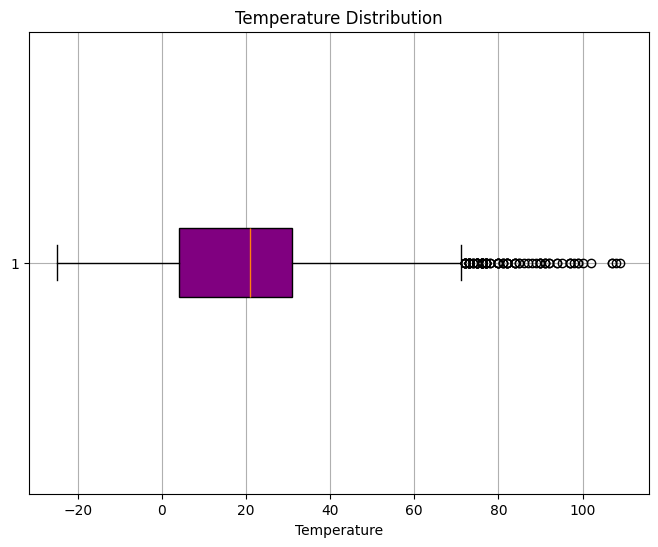

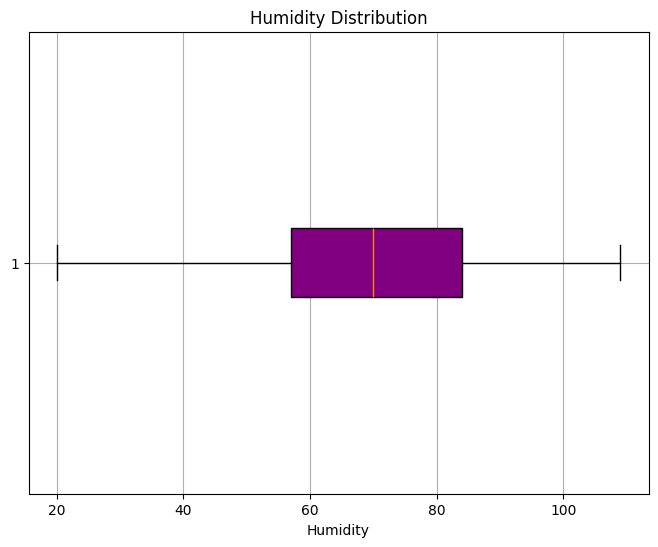

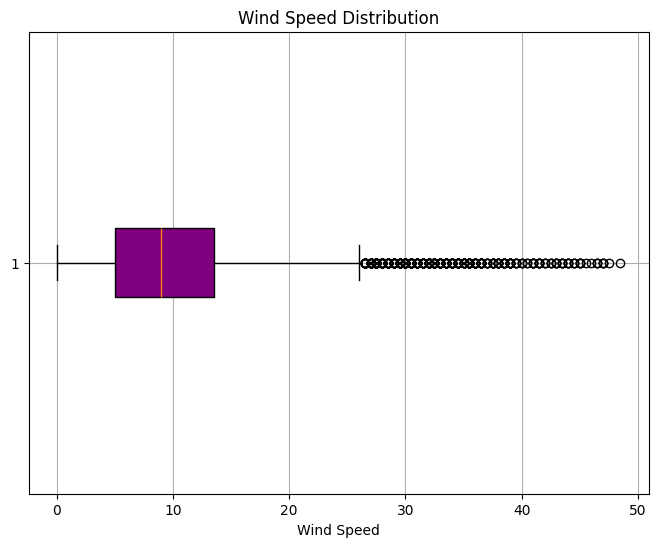

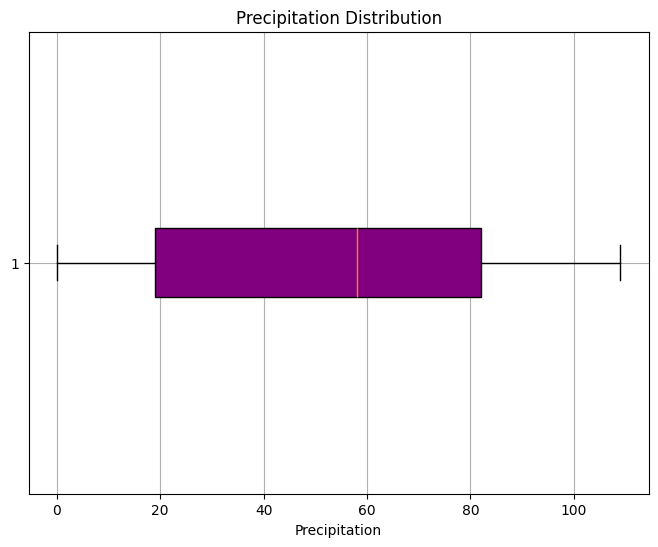

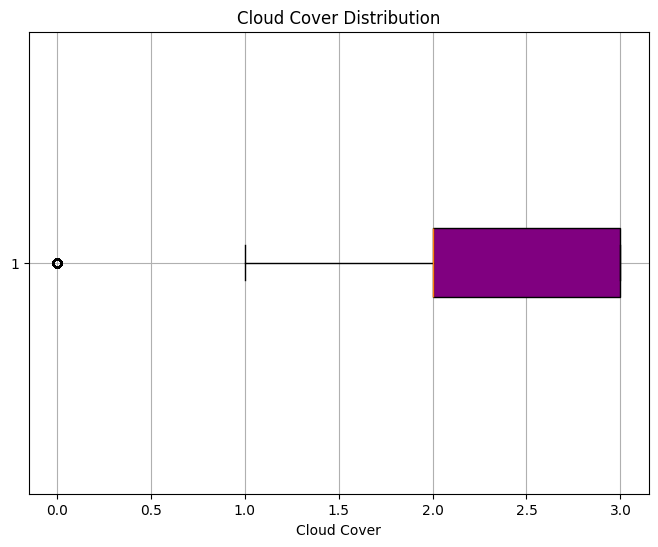

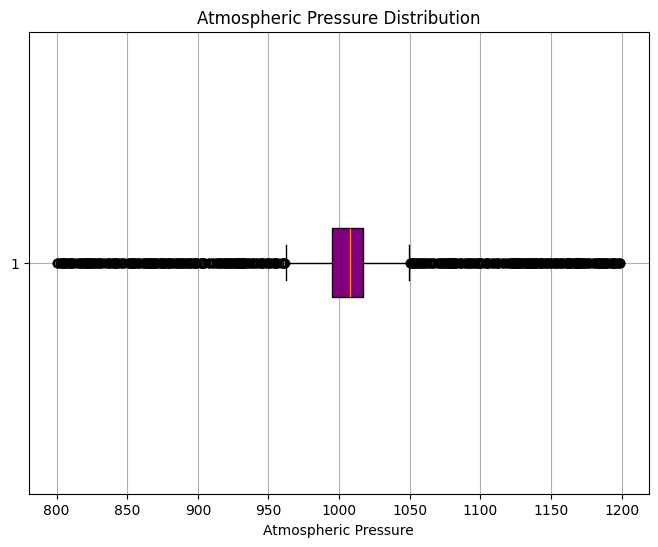

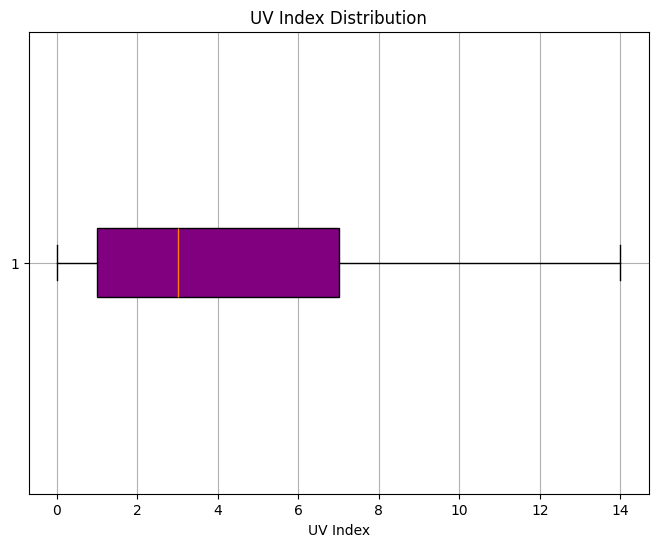

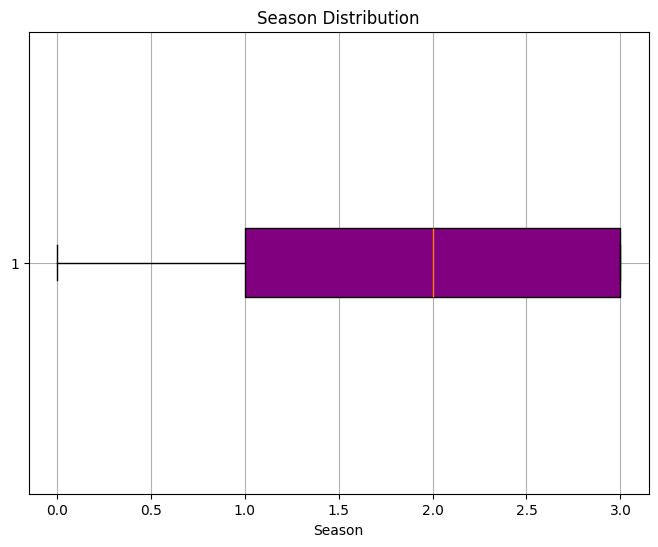

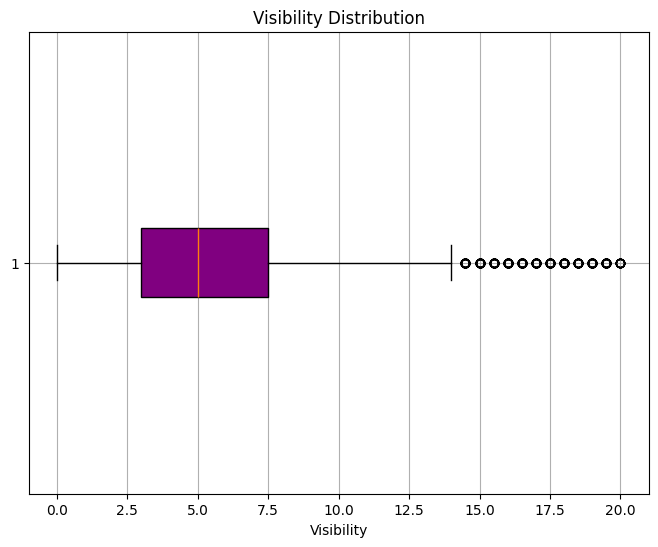

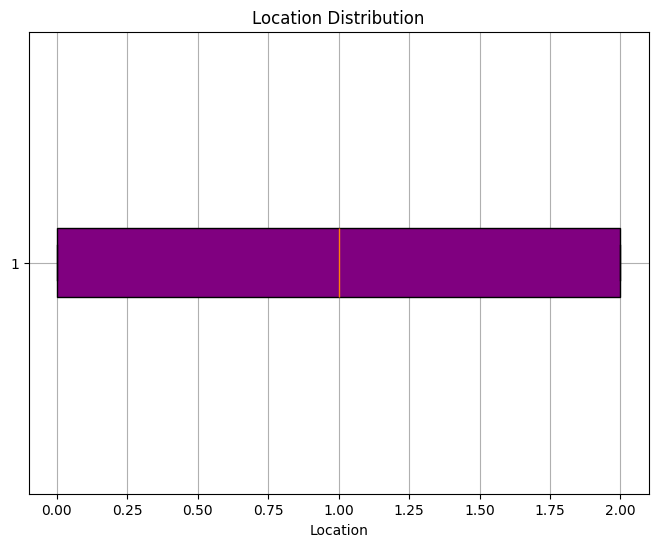

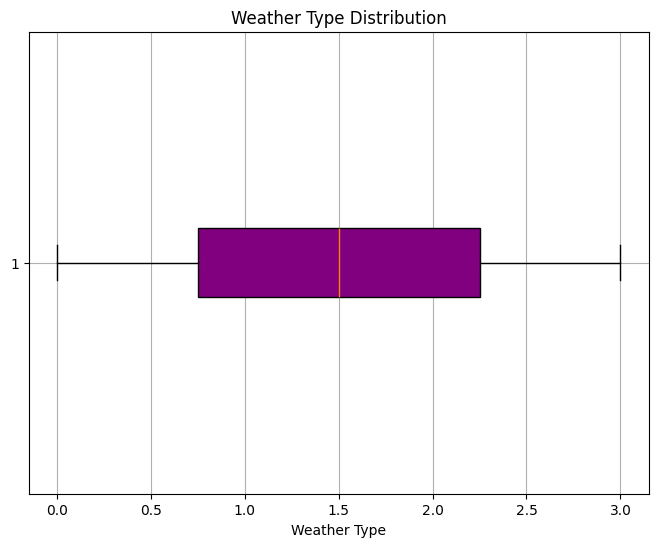

In [ ]:
column_names = [
    'Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover',
    'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility', 'Location', 'Weather Type'
]

# Check if the number of columns in data matches the number of column names
if data_encoded.shape[1] != len(column_names):
    raise ValueError(f"The number of columns in the data ({data_encoded.shape[1]}) does not match the number of column names ({len(column_names)}). Please update the column names list.")

# Loop through all columns in the dataset and generate a box plot for each column
for i in range(data_encoded.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.boxplot(data_encoded[:, i], vert=False, patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
    plt.title(f'{column_names[i]} Distribution')  # Title based on column name
    plt.xlabel(column_names[i])  # X-axis label based on column name
    plt.grid(True)
    plt.show()

# **Feature-target separation**


In this section, the dataset is split into two main components: the features and the target variable. This is a crucial step in the data preprocessing pipeline, as the machine learning model will learn to predict the target variable based on the input features.

1. **Feature-Target Separation**:
   - The features are the input variables that will be used by the model to make predictions. These are typically all the columns in the dataset that are not the target variable.
   - The target variable is the output that the model aims to predict. It is the variable whose values are known in the training dataset, and the model will learn to map the features to this target variable.

2. **Separation Process**:
   The features (input variables) are separated from the target (output variable) using array slicing. In this case, all columns except the last one (assumed to be the target variable "Weather Type") are selected as the features, and the last column is selected as the target variable.

   - `x = data_encoded[:, :-1]`: This line selects all columns except the last one as the features (input variables) for the model. The `:-1` slice excludes the last column, which is the target variable.
   - `y = data_encoded[:, -1]`: This line selects the last column as the target variable. The `-1` index refers to the last column in the array, which corresponds to "Weather Type".

3. **Significance of Feature-Target Separation**:
   Separating the features from the target variable is essential for training the machine learning model. The features serve as the inputs to the model, while the target provides the true values that the model will learn to predict. The feature-target separation allows us to:
   - Prepare the data for training and testing.
   - Apply various preprocessing steps (such as scaling and encoding) separately to the features and target.
   - Train the model using the features and evaluate its performance based on how accurately it predicts the target.

Summary:

This section ensures that the dataset is correctly split into input features and the target variable. The features are used by the model to make predictions, while the target variable provides the labels that the model will learn to predict. This separation is fundamental to the training and evaluation of the machine learning model.


In [ ]:
x = data_encoded[:, :-1]
y = data_encoded[:, -1]

# **Data Preprocessing**

Data preprocessing is a crucial step in the machine learning pipeline, as it ensures that the input data is in a format that can be effectively used by machine learning algorithms. This section focuses on preparing the dataset by standardizing the features, which can significantly improve the performance and convergence speed of certain algorithms.

1. **Standardization of Features**:

   Standardization is the process of scaling the features so that they have a mean of zero and a standard deviation of one. This is important because many machine learning algorithms, such as K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and neural networks, are sensitive to the scale of the input data.

   - The standardization formula is given by:  
     \[ z = \frac{x - \mu}{\sigma} \]  
     where \( x \) is a feature, \( \mu \) is the mean of the feature, and \( \sigma \) is the standard deviation of the feature. This transformation makes each feature contribute equally to the learning process, especially when features have different units or scales (e.g., "Temperature" in degrees Celsius vs. "Humidity" as a percentage).

2. **Function to Standardize Features**:

   A function is defined to standardize the features of the dataset:
   
   - First, the numeric data (i.e., the features) is separated from the target variable. This is done using `x = data_encoded[:, :-1]`, where all columns except the last one (the target variable) are selected.

   - The mean and standard deviation for each feature are computed using `np.mean()` and `np.std()`.
   - Each feature is then standardized by subtracting its mean and dividing by its standard deviation.
   
   This ensures that each feature has a mean of zero and a standard deviation of one, which improves the performance of algorithms that are sensitive to the scale of input features.

3. **Importance of Feature Standardization**:

   Feature standardization is particularly important when:
   - The dataset contains features with different units or scales. For example, temperature may be in degrees Celsius while wind speed is in km/h, and precipitation is in percentage.
   
   - The model used for training is sensitive to the magnitude of the input features. For instance, algorithms like KNN and SVM use distance metrics (e.g., Euclidean distance), and if one feature has a much larger scale than others, it could dominate the learning process, leading to poor model performance.

4. **Standardizing the Data**:

   After applying the standardization function to the features, the dataset is transformed so that all the features have a consistent scale. This step prepares the data for training with algorithms that rely on distance or gradient-based optimization.

   - The standardized features are stored in `x_standardized`, which is then used for training and testing the model. The target variable `y` remains unchanged as it does not require standardization.

Summary:

- This section ensures that the features are standardized so that each feature contributes equally to the model. Standardization is a key preprocessing step for many machine learning algorithms, especially when features have different units or scales. By transforming the data in this way, we ensure that the machine learning model can learn more effectively and converge faster.


In [ ]:
# Function to standardize the features (Standard Scaler)
def standardize_features(data_encoded):
    # Separate numeric data (assuming the last column is non-numeric, such as 'Weather Type')
    numeric_data = data_encoded[:, :-1].astype(float)  # Adjust if the non-numeric column is elsewhere

    # Calculate mean and standard deviation for each feature (column)
    means = np.mean(numeric_data, axis=0)
    std_devs = np.std(numeric_data, axis=0)

    # Apply standardization: (x - mean) / std_dev
    standardized_data = (numeric_data - means) / std_devs

    return standardized_data

In [ ]:
# Standardizing the features
x_standardized = standardize_features(x)

# **Splitting the Dataset into Training and Testing Sets**

In this section, the dataset is divided into two parts: the training set and the testing set. This step is crucial for evaluating the performance of machine learning models and ensuring that they generalize well to unseen data. The training set is used to train the model, while the testing set is reserved for evaluating how well the model performs on new, unseen data.

1. **Purpose of Splitting the Dataset**:

   - **Training Set**: This subset of the data is used to train the model. During training, the model learns the relationship between the features and the target variable. The model adjusts its internal parameters to minimize the error or loss on the training data.

   - **Testing Set**: This subset is kept aside and is not used during the training process. After the model is trained, it is evaluated on the testing set to assess its performance. The goal is to determine how well the model can generalize to unseen data, which provides an estimate of its performance in real-world scenarios.

2. **Train-Test Split**:

   The dataset is typically split into training and testing sets in a ratio (e.g., 70% for training and 30% for testing). This allows the model to learn from a substantial portion of the data while being evaluated on a separate set to avoid overfitting.
   
   - In this notebook, the split ratio is set to 70% for the training set and 30% for the testing set. This means that 70% of the samples will be used to train the model, and 30% will be held back for testing.

   - The split is performed by calculating the split index, which is the point where the data will be divided. This is done using:  
     `train_split = int(len(x_standardized) * 0.7)`  
     This calculates the index based on 70% of the total number of samples.

3. **Separation of Data**:

   After determining the split index, the dataset is divided as follows:
   
   - `x_train = x_standardized[:train_split]`: This extracts the training features, which consist of the first 70% of the standardized feature data.

   - `y_train = y[:train_split]`: This extracts the training target values, corresponding to the first 70% of the target data.
   - `x_test = x_standardized[train_split:]`: This extracts the testing features, consisting of the remaining 30% of the feature data.
   - `y_test = y[train_split:]`: This extracts the testing target values, corresponding to the remaining 30% of the target data.

4. **Significance of Train-Test Split**:

   Splitting the data is essential to avoid overfitting, which occurs when the model learns the noise or random fluctuations in the training data rather than the actual patterns. By evaluating the model on a separate testing set, we can assess whether it has learned generalizable patterns or just memorized the training data.
   
   Additionally, this process allows us to fine-tune the model using the training set and evaluate its performance objectively using the testing set. This ensures that the model is not over-optimized for the training data and is able to perform well on unseen data.

5. **Stratified Split (Optional)**:

   If the target variable is imbalanced (i.e., some classes are overrepresented compared to others), a stratified split can be applied to ensure that each class is proportionally represented in both the training and testing sets. This step helps to prevent the model from being biased towards the majority class.

Summary:

This section ensures that the dataset is properly divided into training and testing sets, which is crucial for evaluating the performance and generalization ability of machine learning models. By reserving a portion of the data for testing, we can ensure that the model is not overfitting and can generalize well to new, unseen data. This train-test split is a fundamental step in the machine learning workflow.


In [ ]:
train_split = int(len(x_standardized) * 0.7)

In [ ]:
x_train = x_standardized[:train_split]
y_train = y[:train_split]

In [ ]:
x_test = x_standardized[train_split:]
y_test = y[train_split:]

# **K-Nearest Neighbors (KNN) Classifier**

In this section, the K-Nearest Neighbors (KNN) algorithm is implemented to perform classification on the weather dataset. KNN is a simple, instance-based learning algorithm that makes predictions based on the majority class of its nearest neighbors in the feature space.


1. **Euclidean Distance Calculation**:

   The first step in implementing KNN is calculating the Euclidean distance between data points. This is the most common distance metric used for KNN, and it measures the straight-line distance between two points in a multi-dimensional space.
   
   The Euclidean distance formula for two points \(x_1\) and \(x_2\) in an \(n\)-dimensional space is given by:

     \[
     \text{distance}(x_1, x_2) = \sqrt{\sum_{i=1}^{n} (x_{1i} - x_{2i})^2}
     \]
     
   In the KNN algorithm, the Euclidean distance is calculated between the test point and all training points. The points with the smallest distances are the nearest neighbors.


In [ ]:
# Function to compute Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

2. **KNN Classifier Class Definition**:

   - The KNN classifier is then defined as a class, which includes the methods to fit the model and make predictions. The core idea of KNN is simple: for a given test data point, the model identifies the \(k\) nearest neighbors from the training data and assigns the class label based on the majority vote of these neighbors.

   - The class is initialized with a hyperparameter \(k\), the number of nearest neighbors to consider. The class also has attributes for storing the training data and labels, which are used for computing distances and finding the nearest neighbors during prediction.

3. **Fitting the KNN Model**:
   
   - The `fit` method takes the training data features and labels and stores them for future use. This method essentially "trains" the model, although in the case of KNN, there is no actual training phase. The training data is simply stored and used when making predictions.

4. **Making Predictions**:
   
   - The `predict` method is responsible for making predictions for the test data. For each test point:

    - The method computes the Euclidean distance between the test point and all training points.
    - It identifies the \(k\) nearest neighbors based on the smallest distances.
    - The class label for the test point is predicted by performing a majority vote among the labels of the nearest neighbors. The class with the most votes is assigned as the predicted label.


In [ ]:
# k-NN classifier class with fit and predict methods
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k  # Number of neighbors
        self.x_train = None  # Training data features
        self.y_train = None  # Training data labels

    # Fit the model with training data
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    # Predict the class labels for the test data
    def predict(self, x_test):
        predictions = []

        # Loop through each test point
        for test_point in x_test:
            # Calculate distances from the test point to all training points
            distances = [euclidean_distance(test_point, train_point) for train_point in self.x_train]

            # Sort the distances and get the indices of the k smallest distances
            k_indices = np.argsort(distances)[:self.k]

            # Get the labels of the k nearest neighbors
            k_nearest_labels = [self.y_train[i] for i in k_indices]

            # Predict the class based on majority vote (most common label among k neighbors)
            predicted_label = np.bincount(k_nearest_labels).argmax()

            # Append the prediction to the list
            predictions.append(predicted_label)

        return np.array(predictions)

In [ ]:
# Initialize the KNNClassifier
knn = KNNClassifier(k=3)

In [ ]:
# Fit the model with the training data
knn.fit(x_train, y_train)

In [ ]:
# Predict the labels for the test data
y_pred_knn = knn.predict(x_test)

5. **KNN Model Evaluation**:

   - After fitting the model and making predictions on the test data, the accuracy of the model is calculated by comparing the predicted labels with the actual test labels. The accuracy score indicates the proportion of correct predictions made by the KNN model.


In [ ]:
knn_accuracy = np.mean(y_pred_knn == y_test)
print(f"Accuracy: {knn_accuracy * 100:.2f}%")

Accuracy: 89.52%


Summary:

- This section demonstrates the implementation of the K-Nearest Neighbors (KNN) algorithm for classification. KNN is an instance-based learning method that assigns labels based on the majority vote of the \(k\) nearest neighbors. The implementation involves computing Euclidean distances, selecting the nearest neighbors, and making predictions based on majority voting. The model is evaluated using accuracy, which measures the proportion of correct predictions made by the classifier. KNN is a simple yet effective algorithm, especially in scenarios where the decision boundary is complex and not easily captured by other models.


# **Random Forest**

In this section, a **Random Forest Classifier** is implemented to perform classification on the weather dataset. Random Forest is an ensemble learning method that combines the predictions of multiple decision trees to improve classification accuracy. It is widely used for its robustness, high performance, and ability to handle complex datasets.


1. **Gini Impurity**:

   The Random Forest algorithm is built on decision trees, which split the data based on certain features. To decide the best feature and threshold for splitting the data, a measure of impurity is needed. One common measure is **Gini impurity**.

   - **Gini Impurity** measures the homogeneity of a dataset. A Gini impurity of 0 indicates that all elements belong to a single class, while a higher value suggests more mixed classes.

   - The function `gini_impurity(y)` calculates the Gini impurity for a set of labels `y`. It computes the relative frequencies of the unique labels in the dataset, squares these frequencies, and subtracts the sum from 1 to get the impurity.

   This metric will be used later in the `best_split` function to identify the best way to split the dataset at each node of the decision tree.


In [ ]:
# Function to calculate Gini Impurity for a given split
def gini_impurity(y):
    class_counts = np.unique(y, return_counts=True)[1]
    total_samples = len(y)
    impurity = 1 - sum((count / total_samples) ** 2 for count in class_counts)
    return impurity

2. **Splitting the Data**:

   The dataset is split into two parts: left and right, based on a given feature and threshold. This is done in the `split_data` function. It creates two groups of samples: one group where the feature values are less than or equal to the threshold, and the other group where the feature values are greater than the threshold.

   The split is performed for each feature and threshold to determine the best way to divide the data into subsets. The Gini impurity of each split is calculated, and the feature and threshold that result in the lowest Gini impurity are selected for further splits.



In [ ]:
# Function to split the data based on a feature and threshold
def split_data(X, y, feature_idx, threshold):
    left_mask = X[:, feature_idx] <= threshold
    right_mask = ~left_mask
    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]
    return X_left, y_left, X_right, y_right

3. **Finding the Best Split**:

   The `best_split()` function is responsible for evaluating every possible split of the dataset and choosing the one that results in the most homogeneous subsets.

   - **Finding the Best Split**: The function loops over each feature (`feature_idx`) and calculates the Gini impurity for every possible threshold value within that feature.

     - For each possible split, the dataset is divided into left and right subsets using the `split_data()` function.
     
     - The Gini impurity for the left and right subsets is calculated, and a **weighted Gini impurity** is computed. The weighted Gini impurity gives a measure of how mixed the classes are in both subsets after the split.
     - The split with the smallest impurity is chosen as the "best" split.

   This function is crucial for decision tree construction, as it allows the algorithm to select the best feature and threshold for each node of the tree.


In [ ]:
# Function to find the best feature and threshold to split the data
def best_split(X, y):
    best_impurity = float('inf')
    best_feature = None
    best_threshold = None
    best_left_y = None
    best_right_y = None

    for feature_idx in range(X.shape[1]):
        thresholds = np.unique(X[:, feature_idx])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split_data(X, y, feature_idx, threshold)
            if len(y_left) > 0 and len(y_right) > 0:
                # Calculate the weighted Gini impurity
                left_impurity = gini_impurity(y_left)
                right_impurity = gini_impurity(y_right)
                weighted_impurity = (len(y_left) / len(y)) * left_impurity + (len(y_right) / len(y)) * right_impurity

                if weighted_impurity < best_impurity:
                    best_impurity = weighted_impurity
                    best_feature = feature_idx
                    best_threshold = threshold
                    best_left_y = y_left
                    best_right_y = y_right

    return best_feature, best_threshold, best_left_y, best_right_y

4. **Building the Decision Tree**:

   The decision tree is built recursively. At each step, the best split is chosen based on Gini impurity. The splitting process continues until one of the stopping conditions is met: all samples in a node belong to the same class, or the maximum depth of the tree is reached.

   The `build_tree` function implements this recursive process. It performs splits based on the Gini impurity and recursively builds the left and right subtrees. When a leaf node is reached (i.e., no further splitting is possible), it returns the most common class label in that node.


In [ ]:
# Function to build a decision tree
def build_tree(X, y, max_depth=None, depth=0):
    if len(np.unique(y)) == 1:  # If all labels are the same, no need to split further
        return y[0]  # Return the class label

    if max_depth and depth >= max_depth:
        return np.argmax(np.bincount(y))  # Return the most common label if max depth is reached

    # Find the best split
    feature_idx, threshold, left_y, right_y = best_split(X, y)

    if feature_idx is None:
        return np.argmax(np.bincount(y))  # Return the most common label if no valid split found

    # Recursively build the left and right subtrees
    X_left, y_left = X[X[:, feature_idx] <= threshold], left_y
    X_right, y_right = X[X[:, feature_idx] > threshold], right_y

    left_tree = build_tree(X_left, y_left, max_depth, depth + 1)
    right_tree = build_tree(X_right, y_right, max_depth, depth + 1)

    return (feature_idx, threshold, left_tree, right_tree)

In [ ]:
# Function to predict the class label for a single sample
def predict_one(tree, x):
    if not isinstance(tree, tuple):  # If it's a leaf node, return the label
        return tree

    feature_idx, threshold, left_tree, right_tree = tree
    if x[feature_idx] <= threshold:
        return predict_one(left_tree, x)
    else:
        return predict_one(right_tree, x)

5. **Random Forest Classifier**:

   A Random Forest is an ensemble of decision trees. The algorithm trains multiple decision trees on random subsets of the data, each with a random subset of features. This randomness ensures that the individual trees are diverse and helps reduce overfitting, which can occur when a single decision tree is too complex.

   - **Bootstrap Sampling**: Random Forest uses a technique called bootstrap sampling, where each tree is trained on a random sample of the data with replacement. This means that some samples may be repeated in a given tree's training set, while others may be left out.

   - **Random Subset of Features**: When splitting a node in a tree, only a random subset of the features is considered. This ensures that each tree in the forest is diverse, and helps to reduce correlation between the trees.

   The RandomForestClassifier class includes the `fit` and `predict` methods:

   - The `fit()` method trains multiple decision trees using bootstrap samples and random feature subsets.
   
   - The `predict()` method aggregates predictions from all the trees in the forest. Each tree votes for a class label, and the class with the most votes is selected as the final prediction.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Random Forest Classifier
class RandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=None, max_features=None):
        self.n_estimators = n_estimators  # Number of trees
        self.max_depth = max_depth  # Max depth of each tree
        self.max_features = max_features  # Max features for each split

    def fit(self, X, y):
        # Encode the labels (ensure they are integers)
        self.encoder = LabelEncoder()
        y_encoded = self.encoder.fit_transform(y)

        self.trees = []
        n_samples, n_features = X.shape

        for _ in range(self.n_estimators):
            # Bootstrap sampling (random sampling with replacement)
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_sample, y_sample = X[indices], y_encoded[indices]

            # Create a random subset of features for splitting
            if self.max_features is None:
                feature_subset = range(n_features)
            else:
                feature_subset = np.random.choice(n_features, size=self.max_features, replace=False)

            # Build the tree
            tree = build_tree(X_sample[:, feature_subset], y_sample, max_depth=self.max_depth)
            self.trees.append((tree, feature_subset))

    def predict(self, X):
        # Collect the predictions from all trees
        predictions = [self._predict_one(tree, feature_subset, x) for x in X for tree, feature_subset in self.trees]

        # Perform majority voting to get the final predictions
        final_predictions = []
        for i in range(0, len(predictions), self.n_estimators):
            # Majority voting without Counter: manually count the votes
            votes = predictions[i:i + self.n_estimators]
            majority_vote = np.argmax(np.bincount(votes))
            final_predictions.append(majority_vote)

        # Decode back to original labels
        return self.encoder.inverse_transform(final_predictions)

    def _predict_one(self, tree, feature_subset, x):
        return predict_one(tree, x[feature_subset])


In [ ]:
# Initialize and fit the Random Forest model
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=3)

In [ ]:
rf.fit(x_train, y_train)

In [ ]:
# Predict the labels for the test data
y_pred_rf = rf.predict(x_test)

6. **Random Forest Model Evaluation**:

   After training the Random Forest model, predictions are made on the test data. The accuracy of the model is calculated by comparing the predicted labels with the actual test labels. The accuracy score represents the proportion of correct predictions.


In [ ]:
# Calculate accuracy
rf_accuracy = np.mean(y_pred_rf == y_test)
print(f"Accuracy: {rf_accuracy * 100:.2f}%")

Accuracy: 85.78%


Summary:

 -  This section demonstrates the implementation of a Random Forest Classifier, an ensemble learning method that improves the performance of individual decision trees by averaging the predictions of multiple trees. It uses Gini Impurity to evaluate the quality of splits, builds decision trees using bootstrap sampling and random feature subsets, and aggregates predictions using majority voting. The model is evaluated based on its accuracy on the test set. Random Forest is a powerful and robust classifier, especially for complex datasets.

# **SVC**

In this section, a **Support Vector Classifier (SVC)** is implemented to perform classification on the weather dataset. SVC is a powerful and widely used machine learning algorithm that aims to find the optimal hyperplane that best separates different classes in a high-dimensional feature space.


1. **Hinge Loss**:

   The SVC uses a **hinge loss function**, which measures the error between the predicted and actual class labels. The hinge loss penalizes predictions that are on the wrong side of the margin (i.e., predictions that are far from the correct class). The loss function is defined as:
   
   \[
   \text{Loss}(w, b, X, y, C) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i(w \cdot x_i + b))
   \]
   
   Where:
   - \(w\) is the weight vector, representing the hyperplane's orientation.
   - \(b\) is the bias term, representing the distance from the origin.
   - \(C\) is the regularization parameter, controlling the trade-off between maximizing the margin and minimizing the classification error.
   - \(y_i\) are the true labels, and \(x_i\) are the feature vectors.
   
   The hinge loss encourages the classifier to correctly classify the samples while maximizing the margin, ensuring that the decision boundary is as far as possible from the nearest samples of each class.


In [ ]:
# Function to compute the hinge loss
def hinge_loss(w, b, X, y, C):
    loss = 1 / 2 * np.dot(w, w)  # Regularization term
    n_samples = len(y)

    for i in range(n_samples):
        margin = y[i] * (np.dot(w, X[i]) + b)
        loss += C * max(0, 1 - margin)  # Add hinge loss term
    return loss

2. **Gradient Calculation**:

   The SVC algorithm uses gradient descent to minimize the hinge loss function. To do this, we need to calculate the gradients of the loss function with respect to the weight vector \(w\) and the bias \(b\). The following function computes these gradients:
   
   The `compute_gradients()` function computes the gradients of the hinge loss with respect to the weight vector and bias. For each sample, it checks if the sample is correctly classified by checking if the margin is greater than or equal to 1. If not, the gradients are updated to reduce the hinge loss.


In [ ]:
# Function to compute gradients of the hinge loss with respect to w and b
def compute_gradients(w, b, X, y, C):
    dw = np.zeros_like(w)
    db = 0
    n_samples = len(y)

    for i in range(n_samples):
        if y[i] * (np.dot(w, X[i]) + b) < 1:  # Misclassified point
            dw -= C * y[i] * X[i]  # Update for w
            db -= C * y[i]  # Update for b

    dw += w  # Regularization gradient for w
    return dw, db

3. **SVC Class Definition**:

   The SVC class is defined with methods for training the classifier (`fit()`) and making predictions (`predict()`). The `fit()` method uses gradient descent to optimize the model's parameters, while the `predict()` method makes predictions based on the learned hyperplane.

   The `fit()` method works by initializing the weight vector \(w\) and the bias term \(b\), and iteratively updating them using the gradients computed by `compute_gradients()`. The algorithm continues to adjust the parameters until the maximum number of iterations is reached or convergence is achieved.

---

4. **Training the SVC**:

   The `fit()` method uses the gradient descent approach to minimize the hinge loss function:

   In the `fit()` method:

   - The weights and bias are initialized to zero.
   - The class labels are converted to -1 and 1, as required by the SVC.
   - The algorithm iteratively updates the weights and bias using the gradients computed from the hinge loss.

---


5. **Making Predictions with SVC**:

   The `predict()` method computes the sign of the decision function \(w \cdot X + b\) for each test sample \(X\). If the result is positive, the predicted class is +1, and if it's negative, the predicted class is -1.

   This method uses the learned weight vector and bias to compute the decision function for each test sample and return the predicted class label.



In [ ]:
# SVM Classifier
class SVC:
    def __init__(self, C=1.0, max_iter=1000, learning_rate=0.001):
        self.C = C  # Regularization parameter
        self.max_iter = max_iter  # Maximum number of iterations
        self.learning_rate = learning_rate  # Learning rate

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights (w) and bias (b)
        self.w = np.zeros(n_features)
        self.b = 0

        y = np.where(y <= 0, -1, 1)  # Make sure labels are -1 and 1

        # Gradient Descent to minimize hinge loss
        for _ in range(self.max_iter):
            # Compute gradients
            dw, db = compute_gradients(self.w, self.b, X, y, self.C)

            # Update weights and bias
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict(self, X):
        # Make predictions using the learned model
        prediction = np.dot(X, self.w) + self.b
        return np.sign(prediction)  # Return -1 or 1 based on the sign

In [ ]:
# Create an SVC model
svm = SVC()

In [ ]:
# Fit the model on the training data
svm.fit(x_train, y_train)

In [ ]:
# Predict the labels for the test data
y_pred_svc = svm.predict(x_test)

6. **SVC Model Evaluation**:

   After training the SVC model, predictions are made on the test data. The accuracy of the model is calculated by comparing the predicted labels with the actual test labels. The accuracy score represents the proportion of correct predictions.


In [ ]:
# Calculate accuracy
svc_accuracy = np.mean(y_pred_svc == y_test)
print(f"Accuracy: {svc_accuracy * 100:.2f}%")

Accuracy: 23.79%


Summary:

- This section demonstrates the implementation of a Support Vector Classifier (SVC) for weather classification. SVC is a powerful machine learning algorithm that maximizes the margin between classes, ensuring that the decision boundary is as wide as possible while minimizing the classification error. The model is trained using gradient descent to minimize the hinge loss function, and predictions are made based on the sign of the decision function. The model is evaluated using accuracy, which indicates how well the classifier generalizes to unseen data. SVC is a robust and efficient classifier, especially in high-dimensional feature spaces.

# **Making a table for results of methods**

Rank	Model		Accuracy Score
1	KNN		0.8952
2	Random Forest		0.8578
3	SVC		0.2379


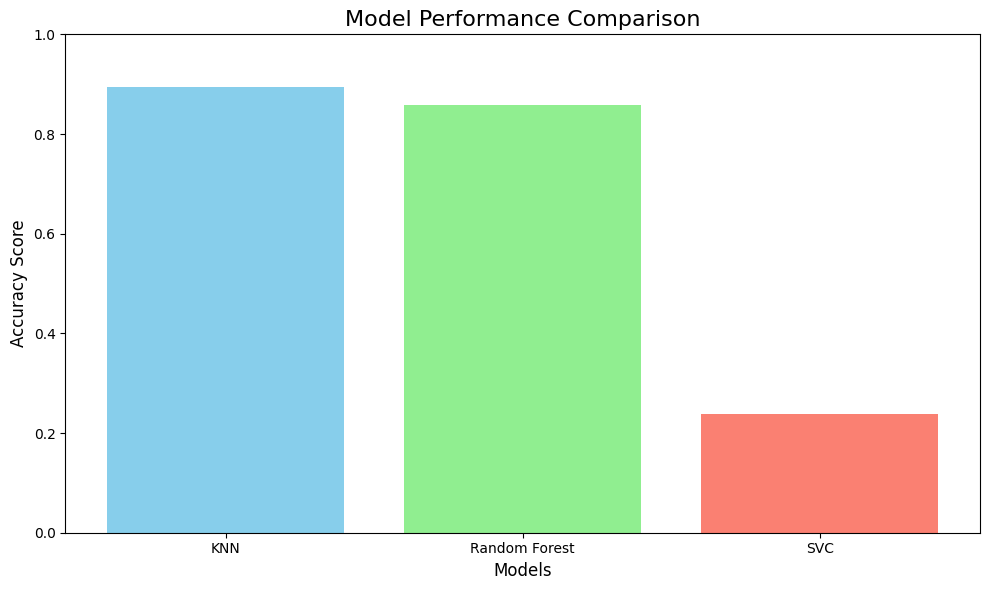

In [ ]:
# Data: Model names and their corresponding accuracy scores
models = ["SVC", "Random Forest", "KNN"]
accuracy_scores = [svc_accuracy, rf_accuracy, knn_accuracy]

# Sort the data by accuracy scores in descending order
sorted_indices = np.argsort(accuracy_scores)[::-1]  # Get indices of sorted values (descending)
sorted_models = np.array(models)[sorted_indices]
sorted_scores = np.array(accuracy_scores)[sorted_indices]

# Create a rank column (index + 1)
ranks = np.arange(1, len(models) + 1)

# Print the sorted results
print("Rank\tModel\t\tAccuracy Score")
for rank, model, score in zip(ranks, sorted_models, sorted_scores):
    print(f"{rank}\t{model}\t\t{score:.4f}")

# Visualization with Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(sorted_models, sorted_scores, color=['skyblue', 'lightgreen', 'salmon'])

# Add titles and labels
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1)

# Show the plot
plt.tight_layout()
plt.show()


# **Key Insights from the Results**



### ✅ **Best Model: KNN**
- **Accuracy: 89.52%**.

- The **KNN (K-Nearest Neighbors)** model achieved the highest accuracy score, making it the top performer for this weather classification task.
- **KNN**, a **lazy learning algorithm**, is effective in situations where decision boundaries are complex. It works by relying on the proximity of data points to make predictions, and its performance here suggests that the weather dataset likely contains clear, separable patterns in the feature space.
- The model performed exceptionally well, possibly due to the effective selection of \(k\), the number of neighbors, and the suitable distance metric for this task.

### ⚠️ **Random Forest: A Close Second**
- **Accuracy: 85.78%**.

- The **Random Forest** model performed well, with an accuracy close to KNN, placing it in second place.
- As an **ensemble method** that combines multiple decision trees, Random Forest works by aggregating the results of various trees trained on different subsets of the data. Its high performance indicates that it is capturing complex patterns effectively.
- Slight improvements in accuracy might be possible with **hyperparameter tuning** such as adjusting the number of trees or tree depth.

### 🟠 **SVC: The Least Performing Model**
- **Accuracy: 23.79%**.
- The **Support Vector Classifier (SVC)** showed a significantly lower accuracy compared to both KNN and Random Forest.
- **SVC** is typically powerful in high-dimensional spaces, but its performance here suggests that it may not be the best model for this dataset. This could be due to the **need for better feature scaling** or **kernel selection**.
- A more **careful selection of the kernel** and **fine-tuning of hyperparameters** may improve performance.

---

## **Conclusion**
- **KNN is the best-performing model**, achieving the highest accuracy. Its ability to capture local relationships in the data is well-suited to the weather classification task, where feature relationships may not be strictly linear but are easily separable using a distance-based approach.

- **Random Forest** follows closely, demonstrating strong performance through the power of ensemble learning. Further improvements could be made with **hyperparameter tuning**, such as adjusting the number of estimators or controlling tree depth.

- **SVC** performed poorly, likely due to a mismatch between the kernel and dataset characteristics. Future improvements could involve experimenting with different **kernel functions** and more **appropriate feature scaling**.

- **KNN and Random Forest** both outperform **SVC**, highlighting the importance of model selection and tuning in achieving optimal results.

